# Mining Tools - Data Science

I particularly like the word _mining_ as it refers to extracting valuable things from data, as it describes the process so well.  It captures not only the idea that you are looking for small bits of valuable things in a mountain of useless rock (or data), but also the danger and confusion of being trapped in a mineshaft.

Consider the following spreadsheet:

![spreadsheet](images/samplesheet.png "Sample Sheet")


It looks like the _workbook_ is organized into _worksheets_: `Ceremony/Reception Scene, Other Details, Flowers, Cakes/Desserts, Place Setting/Table`.  This is all fairly reasonable.  The remaining two sheets appear to be either empty or contain the union of the data in these sheets, so let's just skip them. First, I'll save all of the worksheets to a csv in a directory somewhere and load them into python. We'll just pick the `Cakes/Desserts` csv to work with since they seem to be formatted similarly. There are a few ways we could do this, but I recommend getting comfortable using pandas. pandas is like a swiss army knife for working with tabular data in python. We import pandas as pd because that's the unspoken law of the land.

In [265]:
import pandas as pd
df = pd.read_csv('data/cakes.csv')
df.keys()

Index([u'Image', u'Title', u'Body Copy', u'TBL Studio Link',
       u'Editorial Feedback', u'Published tags', u'Writer',
       u'Auto-Extracted Concepts', u'Suggested Revision Front End Tags',
       u'Suggested Revision Back End Tags', u'Other related tags',
       u'Other Notes', u'url_slug', u'Image Location',
       u'TBL Image S3 Location'],
      dtype='object')

We could have (and may) read the csv with no headers so we can deal with integer indexing by adding `header=None`.  Also, we can read in the whole workbook and deal with it that way if you install a package called `xlrd`.

In [266]:
xlsx = pd.ExcelFile('data/curious_workbook.xlsx')
xlsx.sheet_names

[u'CeremonyReception Scene',
 u'Other Details',
 u'Flowers',
 u'CakesDesserts',
 u'Place SettingTable',
 u'Template',
 u'Extraction']

It looks like the names got munged a bit, but we can figure it out.  Let's grab the one with _cakes_ and load it into a pandas _DataFrame_..

In [267]:
df = pd.read_excel(xlsx, 'CakesDesserts')
df.keys()

Index([u'Image', u'Title', u'Body Copy', u'TBL Studio Link',
       u'Editorial Feedback', u'Published tags', u'Writer',
       u'Auto-Extracted Concepts', u'Suggested Revision Front End Tags',
       u'Suggested Revision Back End Tags', u'Other related tags',
       u'Other Notes', u'url_slug', u'Image Location',
       u'TBL Image S3 Location'],
      dtype='object')

That's good.  You can also reference _df.columns_, but it literally returns the same exact thing. pandas has lots of types but typically we deal with either a _Series_, which is a row in a table, or a _DataFrame_, which is the table.  pandas has some nice was to inspect the data you load into a _DataFrame_.  Let's take a look at our sheet with pandas:

In [268]:
df.count()

Image                                 0
Title                                27
Body Copy                            27
TBL Studio Link                      27
Editorial Feedback                   12
Published tags                       27
Writer                               24
Auto-Extracted Concepts              27
Suggested Revision Front End Tags    27
Suggested Revision Back End Tags     27
Other related tags                    0
Other Notes                           2
url_slug                             27
Image Location                       27
TBL Image S3 Location                 0
dtype: int64

It looks like we've got something like 27 rows with some empty cells.  We can confirm this by checking the length:

In [269]:
len(df)

27

We can also get some summary statistics, though it isn't incredibly useful right now.

In [270]:
df.describe()

,Image,Other related tags,TBL Image S3 Location
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


That's especially cool, but not useful at the moment as we have mostly non-numeric things to work with. But let's keep this one in mind for later.  To see what types we have to work with, let's use `info()`:

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 15 columns):
Image                                0 non-null float64
Title                                27 non-null object
Body Copy                            27 non-null object
TBL Studio Link                      27 non-null object
Editorial Feedback                   12 non-null object
Published tags                       27 non-null object
Writer                               24 non-null object
Auto-Extracted Concepts              27 non-null object
Suggested Revision Front End Tags    27 non-null object
Suggested Revision Back End Tags     27 non-null object
Other related tags                   0 non-null float64
Other Notes                          2 non-null object
url_slug                             27 non-null object
Image Location                       27 non-null object
TBL Image S3 Location                0 non-null float64
dtypes: float64(3), object(12)
memory usage: 3.2+ KB


Let's take a look at one of the rows to see what these things mean:

In [272]:
df.loc[0]

Image                                                                              NaN
Title                                         Four-Tier Fondant Snowflake Wedding Cake
Body Copy                            Erica and Janson left no detail unnoticed, inc...
TBL Studio Link                      http://twobrightlights.com/publication_studio/...
Editorial Feedback                   The backdrop makes this cake rustic, but ultim...
Published tags                                                  2: snow, wedding cakes
Writer                                                                 Libby MacCarthy
Auto-Extracted Concepts              "additional_terms" : [\n\t\t"bride",\n\t\t"ivo...
Suggested Revision Front End Tags    wedding cakes, round cakes, white, whimsical, ...
Suggested Revision Back End Tags                        rustic, wood, candles, roses, 
Other related tags                                                                 NaN
Other Notes                                

It is certainly possible to investigate the image data, but I'll do that in another write-up.  Let's focus in on the textual information we can glean.  I've identified the following categories for investigation: _Title_, _Body Copy_, _Editorial Feedback_, _Published tags_, _Auto-Extracted Concepts_, _Suggested Revision Front End Tags_, and _Suggested Revision Back End Tags_.  I'll grab the indices and store them off for projection:

In [273]:
from __future__ import print_function
res = map( lambda x: print(x), enumerate(df.columns) )

(0, u'Image')
(1, u'Title')
(2, u'Body Copy')
(3, u'TBL Studio Link')
(4, u'Editorial Feedback')
(5, u'Published tags')
(6, u'Writer')
(7, u'Auto-Extracted Concepts')
(8, u'Suggested Revision Front End Tags')
(9, u'Suggested Revision Back End Tags')
(10, u'Other related tags')
(11, u'Other Notes')
(12, u'url_slug')
(13, u'Image Location')
(14, u'TBL Image S3 Location')


In [274]:
focus = [ 1, 2, 4, 5, 7, 8, 9 ]
df.iloc[:,focus].head()

,Title,Body Copy,Editorial Feedback,Published tags,Auto-Extracted Concepts,Suggested Revision Front End Tags,Suggested Revision Back End Tags
0,Four-Tier Fondant Snowflake Wedding Cake,"Erica and Janson left no detail unnoticed, inc...","The backdrop makes this cake rustic, but ultim...","2: snow, wedding cakes","""additional_terms"" : [\n\t\t""bride"",\n\t\t""ivo...","wedding cakes, round cakes, white, whimsical, ...","rustic, wood, candles, roses,"
1,Custom-Made Flower Topper,A white fondant four-tier cake made by Ambrosi...,I wouldn't state this belongs primarily to one...,2: Wedding Cakes Cake Flowers,"""additional_terms"" : [\n\t\t""flower"",\n\t\t""de...","wedding cakes, round cakes, white, green, gar...","cake applique, emerald green, greenery, wood, ..."
2,Whimsical Naked Cake,In honor of their shared love of the TV show “...,Eclectic + Rustic + Romantic: the cake topper ...,5: Fuchsia Wedding Cakes Bohemian Rustic...,"\t""additional_terms"" : [\n\t\t""anniversary"",\n...","wedding cakes, round cakes, naked + transulcen...","casual, dahlias, ranunculus, greenery, romanti..."
3,Simple White Wedding Cake With Orange and Red ...,Karin and Ben's wedding cake from Crisp Bake S...,"missing rustic, simple",4: Orange Red Wedding Cakes Cake Flowers,"\t""additional_terms"" : [\n\t\t""day's"",\n\t\t""p...","simple, wedding cakes, round cakes, white, ear...","affordable, casual, fruit, wood, ferns, bright..."
4,Simple Wedding Cake and Dessert Table,Paso Robles' Paper Cake Events created the cou...,"Cake is very boho, especially with the cake st...",5: Burgundy Desserts Wedding Cakes Bohe...,"\n\t""additional_terms"" : [\n\t\t""events"",\n\t...","bohemian, wedding cakes, cakes + desserts, cak...","naked + translucent cakes, dahlia, garden rose..."


This is starting to look like something we can deal with now.  Now let's take a step back and start generating some questions to be asked of this slice of our data. I like to start from the ground up (at some elevation) to make sure I don't miss anything obvious and also to question my presumptions about things.  In general, I find that most tasks in life can be broken up into _strategy_ (am I doing the *right* things) and _execution_ (am I doing things *well*).  The degree to which errors in any one of these two affects the outcome depends on the domain.  For example, perfect execution of a slightly wrong strategy in chess is probably forgivable and you probably won't lose.  However, perfect execution of an advertising campaign in a completely wrong market chosen by a slightly misguided strategy will make you lose money.  In most cases, picking the wrong strategy is more harmful than a slight misstep in execution.  So let's make sure we're on the right track and our premises are correct. Back to our data...

Each row in the data represents an image with some related descriptive terms.  These are our columns.  You can think of each column as a very condensed summary of the image with a certain flair.  If I asked you to draw the image using the words _Four-Tier Fondant Snowflake Wedding Cake_, you probably wouldn't get it exactly, but you wouldn't draw a picture of an elephant either.  The same goes with every other column.  In this way, our columns give us a very limited amount of information; it's a slice of information, about the image itself.  Data scientists think of these _slices_ in a very similar way to the way we think about a very thin slice of an apple:  they are two-dimensional slices of a three-dimensional object.  You can learn a lot about the shape of an apple from just a 2d slice, depending on where the slice was taken.  If you have more and more slices, eventually you can reproduce the apple. Continuing with the analogy, if I gave you a knife and said "Here, cut a slice." and I took a different knife and cut a different slice, the slices would be different, right?  Another way of saying this is that there would be _variation_ or _variance_ in both of our slices.  Can we still reproduce the apple if our slices are different?  Sure.  One other thing, let's say we don't have the original apple, but we have a big chunk of a particular apple that someone handed us.  Then, we started slicing that one.  When we put our slices together, do you think we could reproduce the chunk?  What about reproducing the original apple?  

Our images themselves aren't the original apple, in this analogy.  They are a lower-dimensional projection of a point in space and time taken by a camera.  How many dimensions?  Well, we are capturing the x and y position of the pixel, as well as the red, green, and blue, and maybe even an alpha color value.  And now you say, "But wait.  That's 5 dimensions and the world is 3d, 4d if you are considering time. And you said we are moving from a highly-dimensional space to a lower-dimensional projection."  Ok.  But while position and time can describe every object, does it describe everything about the object?  What's the color, for example?  The point of all this is that what we are always dealing with lower-dimensional projections of highly-dimensional data, so it helps to get used to the idea of thinking about the attributes of objects existing as a point along some dimension.  When we add up all these points, we can get a better picture of the thing we are dealing with.

So, let's think about the _Title_ for a moment.  The title is a set of words that describe a picture.  We can think of a single title as a single point in the space of all language used for the titles.  Even this is a tremendously high-dimensional space because we not only have the words, we also have grammar rules.  If one photo was titled "Dog bites man" and another was titled "Man bites dog", the words are the same but the meaning is different, for example, because of the rules of english grammar.  Let's simplify this considerably by using something called a _Bag of Words_ model.  This means we throw all the words into a bag, shake them up, and what's in the bag is what describes the image.  This is sometimes called a _multiset_, like a set where duplicates are allowed or counted.

In fact, this line of reasoning works for all of the columns, just with a much lower-dimensional space for some of them, namely the tags.  Maybe a more reasonable starting approach would be to consider the multiset of tags in the columns that don't include natural language.  Let's start with these instead:

In [275]:
focus = [ 5, 7, 8, 9 ]
df.iloc[:,focus].head()

,Published tags,Auto-Extracted Concepts,Suggested Revision Front End Tags,Suggested Revision Back End Tags
0,"2: snow, wedding cakes","""additional_terms"" : [\n\t\t""bride"",\n\t\t""ivo...","wedding cakes, round cakes, white, whimsical, ...","rustic, wood, candles, roses,"
1,2: Wedding Cakes Cake Flowers,"""additional_terms"" : [\n\t\t""flower"",\n\t\t""de...","wedding cakes, round cakes, white, green, gar...","cake applique, emerald green, greenery, wood, ..."
2,5: Fuchsia Wedding Cakes Bohemian Rustic...,"\t""additional_terms"" : [\n\t\t""anniversary"",\n...","wedding cakes, round cakes, naked + transulcen...","casual, dahlias, ranunculus, greenery, romanti..."
3,4: Orange Red Wedding Cakes Cake Flowers,"\t""additional_terms"" : [\n\t\t""day's"",\n\t\t""p...","simple, wedding cakes, round cakes, white, ear...","affordable, casual, fruit, wood, ferns, bright..."
4,5: Burgundy Desserts Wedding Cakes Bohe...,"\n\t""additional_terms"" : [\n\t\t""events"",\n\t...","bohemian, wedding cakes, cakes + desserts, cak...","naked + translucent cakes, dahlia, garden rose..."


Very cool.  We're starting to get closer to actually doing something, so this is starting to get exciting!  Let's pick a couple of them and see what's parsable with less than a pushdown automata...

In [276]:
cake_slice = df.iloc[:,focus]
print(cake_slice.iloc[0:2,:])

                     Published tags  \
0            2: snow, wedding cakes   
1  2:  Wedding Cakes   Cake Flowers   

                             Auto-Extracted Concepts  \
0  "additional_terms" : [\n\t\t"bride",\n\t\t"ivo...   
1  "additional_terms" : [\n\t\t"flower",\n\t\t"de...   

                   Suggested Revision Front End Tags  \
0  wedding cakes, round cakes, white, whimsical, ...   
1  wedding cakes, round cakes, white, green,  gar...   

                    Suggested Revision Back End Tags  
0                     rustic, wood, candles, roses,   
1  cake applique, emerald green, greenery, wood, ...  


We can split _Published tags_ on commas and double-spaces, _Auto-Extracted Concepts_ on tabs and the last two on commas.  Here's the first one:

In [277]:
[ i.lstrip().rstrip().lower() for i in cake_slice.iloc[1,:].values[0].split( '  ' ) if len(i) > 2 ]

[u'wedding cakes', u'cake flowers']

For the second one, I'm going to use `wordpunct_tokenize` from nltk's `tokenize` module so I don't have to strip a bunch of things out:

In [278]:
import nltk.tokenize as tok
[ i.lower() for i in tok.wordpunct_tokenize(df.iloc[0,7]) if len(i) > 2 and i not in [ 'additional_terms', 'concepts' ] ]

[u'bride',
 u'ivory',
 u'brown',
 u'buttercream',
 u'desserts',
 u'guests',
 u'reception',
 u'romantic',
 u'tables',
 u'winter',
 u'wedding',
 u'fondant',
 u'donuts',
 u'whimsical',
 u'white',
 u'wedding',
 u'cakes']

For completeness sake, here's the other two:

In [279]:
print( [ word.rstrip().lstrip().lower() for word in cake_slice.iloc[1,:].values[2].split(',') ] )

[u'wedding cakes', u'round cakes', u'white', u'green', u'garland', u'eclectic', u'tiered cakes', u'cake display']


In [280]:
print( [ word.rstrip().lstrip().lower() for word in cake_slice.iloc[1,:].values[3].split(',') ] )

[u'cake applique', u'emerald green', u'greenery', u'wood', u'modern', u'glamorous', u'black', u'gold', u'alternative', u'bohemian', u'whimsical', u'farm + ranch', u'trees']


Now, let's do the same thing with the whole slice of the cakes dataframe.  I'm going to build a little filter bank and spin through the dataframe.  This kind of _ETL_ is common.

In [281]:
from unidecode import unidecode
from collections import defaultdict
import re
filters = { 0: lambda s: [ i.lstrip().rstrip().lower() for i in re.split( r'(\d\:\s+|,|\s{2})', s ) 
                          if len(i.lstrip().rstrip()) > 2 ],
            1: lambda s: [ i.lower() for i in tok.wordpunct_tokenize(s) 
                          if len(i) > 2 and i not in [ 'additional_terms', 'concepts' ] ],
            2: lambda s: [ word.rstrip().lstrip().lower() for word in s.split(',') ],
            3: lambda s: [ word.rstrip().lstrip().lower() for word in s.split(',') ] }
cake_data = defaultdict(list)
for index, row in cake_slice.iterrows():
    for i,col in enumerate(row):
        c = filters[i](unidecode(col))
        cake_data[i].append(c)
cakes_df = pd.DataFrame(cake_data)
cakes_df.head()

,0,1,2,3
0,"[snow, wedding cakes]","[bride, ivory, brown, buttercream, desserts, g...","[wedding cakes, round cakes, white, whimsical,...","[rustic, wood, candles, roses, ]"
1,"[wedding cakes, cake flowers]","[flower, decorated, painted, topper, fondant, ...","[wedding cakes, round cakes, white, green, gar...","[cake applique, emerald green, greenery, wood,..."
2,"[fuchsia, wedding cakes, bohemian, rustic, cak...","[anniversary, cake, topper, honor, shared, cak...","[wedding cakes, round cakes, naked + transulce...","[casual, dahlias, ranunculus, greenery, romant..."
3,"[orange, red, wedding cakes, cake flowers]","[day, palette, cake, people, blossoms, califor...","[simple, wedding cakes, round cakes, white, ea...","[affordable, casual, fruit, wood, ferns, brigh..."
4,"[burgundy, desserts, wedding cakes, bohemian, ...","[events, created, couple, cake, topped, paper,...","[bohemian, wedding cakes, cakes + desserts, ca...","[naked + translucent cakes, dahlia, garden ros..."


Pretty good.  Pretty, pretty, pretty, pretty, pretty good.  What would be interesting, however, is to read in the flowers sheet as well, clean it up, and see if we can start to observe differences between the two.  If we can, it will go a long way to answering which piece of information lets us best distinguish between cake photos and flower photos.  Here's the code for that:

In [282]:
flowers_df = pd.read_excel( xlsx, 'Flowers' )
flowers_slice = flowers_df.iloc[:,focus]
flowers_data = defaultdict(list)
for index, row in flowers_slice.iterrows():
    for i,col in enumerate(row):
        c = filters[i](unidecode(col))
        flowers_data[i].append(c)
flowers_df = pd.DataFrame(flowers_data)
flowers_df.head()

,0,1,2,3
0,"[chandeliers, flower arrangements, reception]","[decorations, accents, country, country, club,...","[floral chandelier, rustic, bohemian, euctalyp...","[green, red, string lights, wood, earth tones,..."
1,"[centerpieces, reception, succulents]","[succulent, noted, california, succulents, eco...","[centerpieces, short centerpieces, natural, mo...","[affordable, gray, linens, gardenias, white, v..."
2,"[burgundy, bouquets, bohemian, ranunculus, ferns]","[dahlia, carried, tied, fresh, full, blooms, v...","[bohemian, rustic, red, bouquets, burgandy]","[elegant, natural, earth tones, green, greens,..."
3,"[diy, bouquets, flower alternatives]","[bouquet, flowers, created, beautiful, favorit...","[bouquets, diy, colorful, brights, flower alte...","[affordable, book, artistic, bouquet wraps, pe..."
4,"[fuchsia, centerpieces, reception, dahlias, ro...","[dahlia, blooms, arrangements, large, small, d...","[centerpieces, short centerpieces, romantic, j...","[brights, casual, elegant, gold, burgandy, ros..."


Now, the investigation begins.  Since each column represents a certain kind of tag data (with a certain _flair_ as we mentioned before), we expect them to have some overlap, but also some areas where they don't overlap.  If we take the set of all words in a column as the extents of that particular colunmn's feature space, and we take a look at the most common words across all columns, it will start to give us a feel for the kind of overlap we are dealing with. The higher the overlap, the greater the amount of redundancy in the data and the less information gained in general.  In other words, the more highly correlated the sets are, the less total information we have, and the higher the total correlation or mutual information. We measure this total correlation with the _Kullback-Leibler divergence_, which quantifies the difference between two distributions.  If the KL-divergence is 0, we can expect identical distributions.  If the KL-divergence is 1, we can expect that the words are completely independent.  We'll explain and measure this quantity in a bit, but for now, let's just look at the counts:

In [283]:
from itertools import chain
from collections import Counter
for col in flowers_df.columns:
    print( "Column {}:\n{}".format(col,'\n'.join(str(t) for t in Counter( chain( *flowers_df.iloc[:,col] ) ).most_common(5))) )

Column 0:
('bouquets', 19)
('roses', 11)
('centerpieces', 10)
('ferns', 5)
('white', 5)
Column 1:
('bouquets', 26)
('white', 21)
('roses', 20)
('centerpieces', 15)
('flowers', 12)
Column 2:
('bouquets', 23)
('romantic', 11)
('modern', 11)
('centerpieces', 9)
('greens', 7)
Column 3:
('elegant', 8)
('romantic', 7)
('roses', 7)
('vases', 7)
('traditional', 7)


And the same thing with the cakes...

In [284]:
for col in cakes_df.columns:
    print( "Column {}:\n{}".format(col,'\n'.join(str(t) for t in Counter( chain( *cakes_df.iloc[:,col] ) ).most_common(5))) )

Column 0:
('wedding cakes', 23)
('cake flowers', 13)
('tiered cakes', 8)
('round cakes', 7)
('cakes + desserts', 6)
Column 1:
('wedding', 52)
('cake', 25)
('cakes', 24)
('white', 12)
('gold', 8)
Column 2:
('wedding cakes', 18)
('cake flowers', 12)
('white', 8)
('whimsical', 7)
('tiered cakes', 6)
Column 3:
('round cakes', 15)
('wood', 9)
('fondant', 9)
('tiered cakes', 8)
('bohemian', 7)


We can already see some good separation between these particular sets in the 5 most frequent terms. There is some intersection between them as well, which we can confirm by just checking the length of the intersection of the terms:

In [285]:
len( set(Counter( chain( *chain( *chain( row.tolist() for col,row in cakes_df.iterrows()) )) ).keys()).intersection
   ( set(Counter( chain( *chain( *chain( row.tolist() for col,row in flowers_df.iterrows()) )) ).keys()) ))

151

### Analyzing the data

Ok.  We loaded our data and began the analysis process just getting our feet wet, looking at some counts and summary statistics that really don't tell us much but make us feel like we're at least cutting a path in the jungle.  Let's move heavily into some analysis of different parts of it.  We can start by posing some questions:

* _How well do the tags alone in these 4 columns let us distinguish between the sheets?_
* _If we were presented with only the tags on an image, could we identify which sheet it came from?_

### Dimensionality Reduction

To start answering these questions, let's treat each of the images as a point in space and color them based on the origin sheet.  Then, if we plot them, we should be able to see all of the cakes grouped together, all of the flowers grouped together, etc.  The problem, however, is what to plot.  Our data has as many dimensions as the union of all tags in the data and we would like to have at most 2 or 3 dimensions to plot on our screen.  We need to engage some techniques referred to as _dimensionality reduction_.  There are lots of ways to do this, so it's easy to get lost if you drop that phrase into google and follow things around.  The main thing to keep in mind is that our data has variation that we call _variance_.  Variance is a quality of data that makes it uniquely represent something.  Think about this for a moment.  If two pieces of data have no variation between them, they are identical, or perfectly similar.  On the other hand, if two pieces of data have lots of variation, they are very dissimilar.  One general approach to dimensionality reduction is to choose those dimensions of the data that capture the maximum amount of variation.  This is usually done using some form of _eigendecomposition_ or _singular-value decomposition_, so most techniques will use this in one way or another. It is also possible to use the _KL-divergence_ in the following way: KL-divergence is a measure of the information lost when using a distribution _q(x)_ to approximate _p(x)_.  By minimizing this measure over the space of all of our data in _p(x)_, we can find the right mapping of points in _q(x)_ that minimizes the information loss by moving to a lower-dimensional space.  t-SNE is one technique we will use to perform this mapping.  

Our tag data is also _categorical_ in nature in that tags are either present or not.  Count-based text data where words are counted and, optionally, frequency weighted, would be _quantitative_ or _real-valued_ in nature.  That is, the numbers represent a quantity in the data as opposed to a quality.  Knowing this about our data is key, as it will limit the kind of techniques we can choose among to reduce the number of dimensions.  _Principal Component Analysis_, for example is a common technique that performs eigendecomposition to solve for a number of principal components in the data.  These principal components are essentially the _axes_ of the variation within the data.  They are linearly independent and we order them in terms of the amount of variation they capture within the data.  If we can capture 90% of the variation within our highly-dimensional data with the first 3 principal components, it does a reasonable job of approximating a highly-dimensional space with only 3 dimensions.  The problem with using PCA on categorical data is that there is no well-defined notion of _mean-centering_.  The net result is that the first few components are completely wrong.  Instead, we will first use a different principal component technique called _Multiple Correspondence Analysis_ or _MCA_.  The MCA technique, instead of operating on a mean-centered quantitative matrix, takes as input either a _contingency table_ or a _complete disjunctive table_ or a _Burt table_, and produces a lower-dimensional set of factors which represent the underlying structure in the data.  Let's jump to it, but first, let's load in all of the sheets:

In [286]:
sheet_tags = {}
sheet_text = {}
colors=[]
sheet_colors={}
for color, sheet in zip(('red','green','blue','orange'), 
                        ('CakesDesserts', 'Flowers', 'CeremonyReception Scene', 'Place SettingTable')):
    sheet_colors[sheet] = color
    df = pd.read_excel(xlsx, sheet)

    text_focus = [ 'Title', 'Body Copy' ]
    slice = df.loc[:,text_focus].fillna('')
    sheet_text[sheet] = slice
    
    tag_focus = [ 'Published tags',
                  'Auto-Extracted Concepts',
                  'Suggested Revision Front End Tags',
                  'Suggested Revision Back End Tags' ]
    slice = df.loc[:,tag_focus].fillna('')
    slice_data = defaultdict(list)
    for index, row in slice.iterrows():
        for i,col in enumerate(row):
            c = filters[i](unidecode(col))
            slice_data[i].append(c)
    sheet_tags[sheet] = pd.DataFrame(slice_data)
    colors.extend( [color]*len(df) )

Next, let's go through a process called _vectorization_.  Vectorization is where we convert our data to a vector of numbers as inputs to our algorithms.  There are many ways we can vectorize, so this is one of the knobs in our analysis techniques that we'll need to find the right setting for.  Here, I'm going to vectorize both the tags and the free-text.  For the tags, I'm simply going to count them with _sklearn's_ _CountVectorizer_, and for the free-text, we'll use the _TfidfVectorizer_.  Before vectorizing both, we'd like to remove some stop-words...

In [287]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from stop_words import get_stop_words
all_text = []
for sheet, df in sheet_text.iteritems():
    for idx, row in df.iterrows():
        all_text.append(': '.join(row.values))
        
all_tags = []
tag_vocabulary = set([])
for sheet, df in sheet_tags.iteritems():
    for idx, row in df.iterrows():
        tag_vocabulary.update(chain(*row.tolist()))
        all_tags.append( ','.join( chain(*row.tolist()) ) )
        
st_words = get_stop_words('en')
st_words.extend( ['tag', 'tags', 'additional_terms', 'body', 'end'] )
tvectorizer = TfidfVectorizer( input='content', stop_words=st_words )
cvectorizer = CountVectorizer( input='content', vocabulary=tag_vocabulary )
Xtext = tvectorizer.fit_transform(all_text)

Now, I'll run the correspondence analysis on the tag data.  I set the number of latent factors at 2 just to make a plot for inspection

In [288]:
import mca
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, metrics

smca = cvectorizer.fit_transform(all_tags).toarray()
df_mca = pd.DataFrame( smca, columns=cvectorizer.get_feature_names() )

mca_tags = mca.mca(df_mca, cols=df_mca.columns)
points = mca_tags.fs_r( N=2 )
df_p = pd.DataFrame(points)
df_p.head()

,0,1
0,0.008003,-0.017655
1,-0.002954,-0.010164
2,-0.000122,0.002101
3,0.099460,-0.093874
4,0.006539,-0.003057


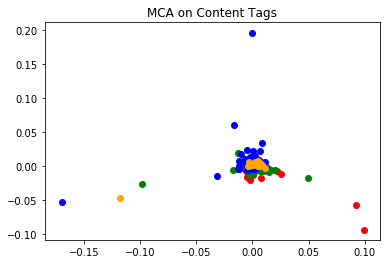

In [289]:
plt.figure()
for idx, row in df_p.iterrows():
    plt.scatter( row[0], row[1], color=colors[idx] )
    
plt.title( 'MCA on Content Tags' )
plt.show( 'rw_mca_tags.png' )

Well, it's hard to see what's going on here, mainly because matplotlib is trying to fit all of our data on the screen.  If we could remove the outliers, we could see what the clump in the middle looks like.  There are lots of ways we can detect outliers.  Maybe the first thing that comes to mind is, just remove things that are outside of a certain number of standard deviations from the mean.  The problem with this kind of method is that the standard deviation and mean are not _robust estimators_ of central tendency.  That is, they are themselves heavily influenced by the presence of outliers.  Consider the following array:

In [290]:
eg = pd.DataFrame( [ 3,3,4,4,3,5,4,3,3,4,5 ] )
print( eg.describe() )
print( '{:<8}{}'.format('mid', eg.median().values[0]) )

               0
count  11.000000
mean    3.727273
std     0.786245
min     3.000000
25%     3.000000
50%     4.000000
75%     4.000000
max     5.000000
mid     4.0


Now lets add an outlier and do the same:

In [291]:
eg = pd.DataFrame( [ 3,3,4,4,3,5,4,3,3,4,5,10000000 ] )
print( eg.describe() )
print( '{:<8}{}'.format('mid', eg.median().values[0]) )

                  0
count  1.200000e+01
mean   8.333368e+05
std    2.886750e+06
min    3.000000e+00
25%    3.000000e+00
50%    4.000000e+00
75%    4.250000e+00
max    1.000000e+07
mid     4.0


Notice that the mean and standard deviation are now very large, but the median is still 4.0 in both cases.  This is what we mean when we say that the mean and standard deviation are not robust estimators.  Something we typically do, then, is remove points that are some _median absolute deviation_ from the median.  That is, we take the median, compute the magnitude of the deviation of each point from the median, and then take the median of that result as our measure of how much of an _outlier_ a point is:

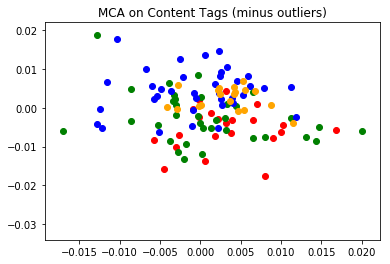

In [292]:
central_points = df_p[ df_p.abs() < 2*df_p.mad() ].dropna()
plt.figure()
for idx, row in central_points.iterrows():
    plt.scatter( row[0], row[1], color=colors[idx] )
    
plt.title( 'MCA on Content Tags (minus outliers)' )
plt.show( 'rw_mca_tags.png' )

Much better.  It looks like MCA is definitely finding some reasonably discriminative latent structure in our tag data when it boils it down to the first two principal components.  Why did we pick two?  Only so that we could plot.  It isn't likely that we are capturing enough of the variance within the data with only two dimensions.  In fact, if we instruct MCA to preserve the factors that capture 90% of the variance, we get around 40 different factors.  The problem is, we can't plot 40.  But, fear not, we can get a sense for how separated these clusters are when higher dimensions are used.  What we will do is first, run our data through MCA with a larger number of dimensions, say 40.  Then, we will attempt to cluster the data.  Since we know what the true cluster assignment should be, we can compare the results and see how we did.  To do this, we will introduce a series of multi-dimensional clustering algorithms as well as a measure to validate the assignment.  Typically, one uses something called a _v-measure_, an entropy measurement which is very analogous to an _F-measure_ in classification analysis.  V-measure is the harmonic mean between _completeness_: each of a given class assigned to the same cluster and _homogeneity_: clusters have only one class represented.  The higher the v-measure, the better our clustering algorithm did.  Let's take a look:

In [293]:
from collections import OrderedDict
color_clusters = { c:i for i,c in enumerate(sheet_colors.values()) }
mca_tags = mca.mca(df_mca, cols=df_mca.columns)
all_points = OrderedDict( (N,mca_tags.fs_r( N=N )) for N in [ 2, 10, 40 ] )
for N, points in all_points.iteritems():
    df_p = pd.DataFrame(points)
    central_points = df_p[ df_p.abs() < 2*df_p.mad() ].dropna()
    true_clusters = []
    for idx, row in central_points.iterrows():
        true_clusters.append( color_clusters[ colors[idx] ] )
    print()
    print( '{}-factor clustering performance'.format(N) )
    print( '{:^40}{:^20}{:^20}{:^20}'.format( 'Type', 'Homogeneity', 'Completeness', 'V-measure' ) )
    print( '-'*100 )
    for name, clu in zip( ('Spectral Clustering', 'KMeans', 'Mini-batch KMeans', 'Affinity Propagation'),
                        ( cluster.SpectralClustering( n_clusters=len(color_clusters) ),
                          cluster.KMeans( n_clusters=len(color_clusters) ),
                          cluster.MiniBatchKMeans( n_clusters=len(color_clusters) ),
                          cluster.AffinityPropagation() ) ):

        preds = clu.fit_predict( central_points )
        hscore, cscore, vmeasure = metrics.homogeneity_completeness_v_measure( true_clusters, preds )
        print( '{:^40}{:^20.2}{:^20.2}{:^20.2}'.format( name, hscore, cscore, vmeasure ) )


2-factor clustering performance
                  Type                      Homogeneity         Completeness         V-measure      
----------------------------------------------------------------------------------------------------
          Spectral Clustering                   0.12                0.15                0.14        
                 KMeans                         0.17                0.17                0.17        
           Mini-batch KMeans                    0.17                0.17                0.17        
          Affinity Propagation                  0.26                0.15                0.19        

10-factor clustering performance
                  Type                      Homogeneity         Completeness         V-measure      
----------------------------------------------------------------------------------------------------
          Spectral Clustering                   0.35                0.35                0.35        
                 KMeans 

From the above table, K-means clustering on 10 factors produces the tightest clusters.  Another way of thinking about this result is that the first 10 principal components contain enough of the significant underlying factors in the data that explain the variability in such a way that we are able to discriminate between the somewhat overlapping classes based on these 10 alone.

How exactly should we interpret the principal axes in our plot? We plotted something called "fs_r" above.  These are the _factor scores_ for the rows.  Each of these scores gives the relation between the row and one of the principal components that we discovered.  We chose the x axis to represent the first principal component (the one that explains the most variability) and the y axis to represent the second principal component.  Close points with respect to a given axis indicate similarity between those two rows and the particular latent feature that the first component represents.  For example, let's say color is what represents the first component, and since cakes and flowers are colored differently, that explains (confounds?) much of the difference in the tags.  Two points might be colored similarly if they are close along this first dimension (project the points down to the x axis and see if they are close together on that line).

### Topic Extraction

Let's shift gears a bit and turn our attention to analyzing the natural language text of each image.  One reasonable starting approach is to attempt to extract the main points from all of the text associated with an image.  These main points are called _topics_.  For example, a bit of text like

_Elegant, Intimate Reception With Flower Garlands at at La Maison des Centraliens: "The flowers were a combination of white hydrangeas and roses," says Morgan, who chose a stunning garland of blossoms to adorn the banquet table that seated Kevin and her and their 10 guests at the reception._

seems to have a broad topic like `Banquet table flower decorations`, but if you had to pick just one word, you might choose _flower_ or _reception_ or _banquet_.  Then, we would likely be able to either group images into topics or identify the topics that are most likely represented by the language.

The technique we will use to do this is called _Latent Dirichlet Allocation_.  The primary assumptions behind this technique are:

* A small number of _topics_ are associated with a piece of text.  These topics generate words with some probability.  For example, if someone is writing about animal conservation efforts, there would be a much higher probability of the words 'endangered', 'species', 'man-made', etc. than there would words like 'transaxle', 'antenna', 'muffler', etc.
* We encode this intuition with a _dirichlet_ distribution.  This distribution is a multi-variate generalization of the beta distribution where we can vary the number of topics by the mass parameter.

performing latent semantic analysis on workbook...


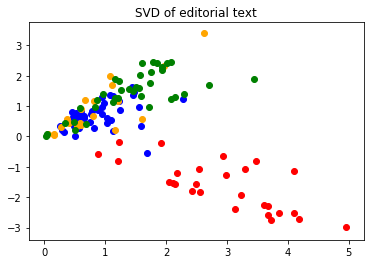

In [294]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from stop_words import get_stop_words

colors = []
colors_sheets = { 'CakesDesserts' : 'red', 'Flowers' : 'green', 'CeremonyReception Scene' : 'blue', 'Place SettingTable' : 'orange' }

# lsa
print( 'performing latent semantic analysis on workbook...' )

all_rows = []
for sheet, df in sheet_text.iteritems():
    for idx, row in df.iterrows():
        all_rows.append(': '.join(row.values))
        colors.append( colors_sheets[sheet] )

st_words = get_stop_words('en')
st_words.extend( ['tag', 'tags', 'additional_terms', 'body', 'end'] )
vectorizer = CountVectorizer( input='content', stop_words=st_words )
X = vectorizer.fit_transform(all_rows)
svd = TruncatedSVD( n_components=2, n_iter=7, random_state=42 )
X_p = svd.fit_transform(X)
np.set_printoptions(suppress=True)

plt.figure()
plt.title('SVD of editorial text')
for idx, (x,y) in enumerate( zip(X_p[::,0], X_p[::,1]) ):
    plt.scatter( x, y, color=colors[idx] )

plt.show()

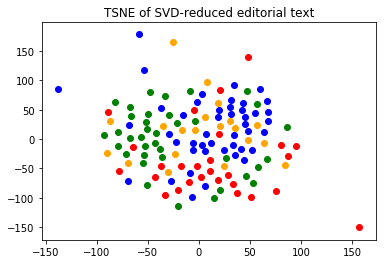

In [295]:
svd = TruncatedSVD( n_components=5, n_iter=7, random_state=42 )
X_p = svd.fit_transform(X)
model = TSNE( n_components=2, random_state=0, early_exaggeration=8.0, metric='precomputed' )
distances = squareform( pdist( X_p, metric='cosine' ) )
distances[np.isnan(distances)] = 0
Y_map = model.fit_transform(distances)
    
plt.figure()
plt.title( 'TSNE of SVD-reduced editorial text' )
for idx, (x,y) in enumerate( zip(Y_map[::,0], Y_map[::,1]) ):
    plt.scatter( x, y, color=colors[idx] )

plt.show()

In [296]:
n_topics = 4
lda = LatentDirichletAllocation( n_topics=n_topics, max_iter=5, random_state=42 )
X_p = lda.fit_transform(X)
top_words = 2
print( '{:^20}{:^80}'.format( 'Topic', 'Terms' ) )
print( '-'*100 )
for i, topic in enumerate(lda.components_):
    terms = '-'.join([vectorizer.get_feature_names()[j] for j in topic.argsort()[:-top_words-1:-1]])
    print( '{:^20}{:^80}'.format( i, terms ) )

/usr/local/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


       Topic                                             Terms                                      
----------------------------------------------------------------------------------------------------
         0                                         succulents-bouquet                               
         1                                            cake-wedding                                  
         2                                           white-bouquet                                  
         3                                          white-reception                                 


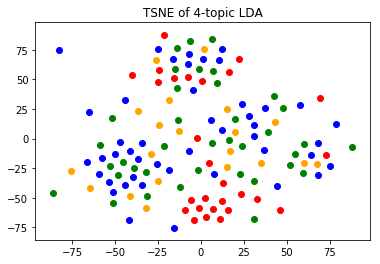

In [297]:
estimated_topics = []
for i, row in enumerate(all_rows):
    vrow = X[i]
    prob_dist = lda.transform( vrow )
    estimated_topics.append(prob_dist[0])

et = np.array(estimated_topics)

et_model = TSNE( n_components=2, random_state=0, early_exaggeration=8.0 )
Y_map = et_model.fit_transform(et)
plt.figure()
plt.title('TSNE of {}-topic LDA'.format(n_topics) )
for idx, (x,y) in enumerate( zip(Y_map[::,0], Y_map[::,1]) ):
    plt.scatter( x, y, color=colors[idx] )
plt.show()

### Supplimentary Graphs

X.shape is (129, 16)
computing raw SVD


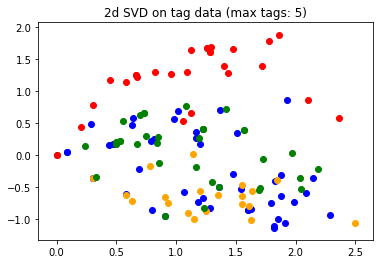

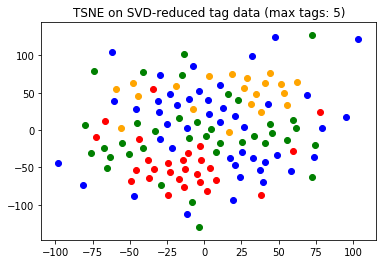

X.shape is (129, 30)
computing raw SVD


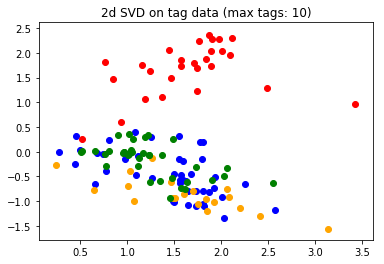

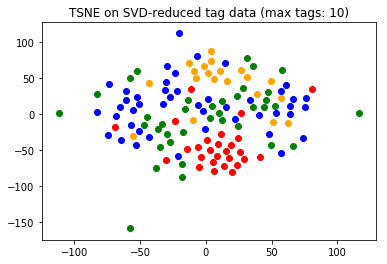

X.shape is (129, 55)
computing raw SVD


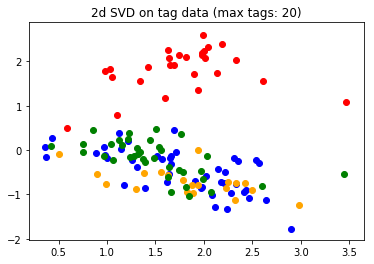

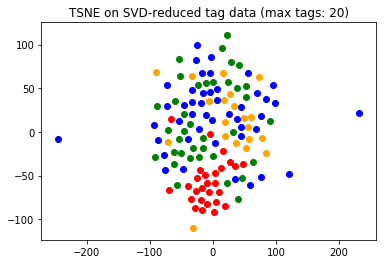

X.shape is (129, 88)
computing raw SVD


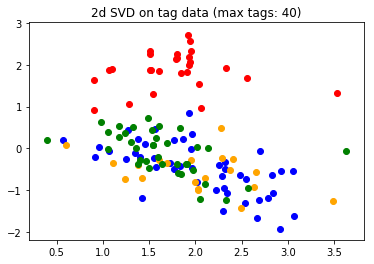

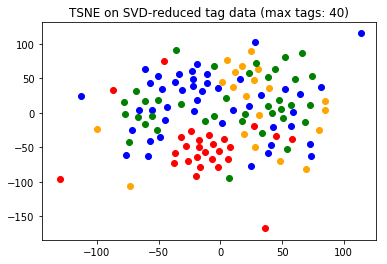

X.shape is (129, 183)
computing raw SVD


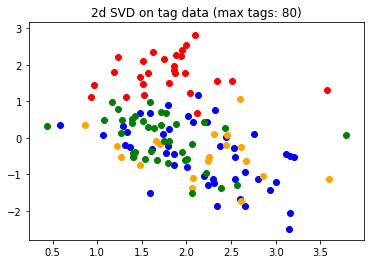

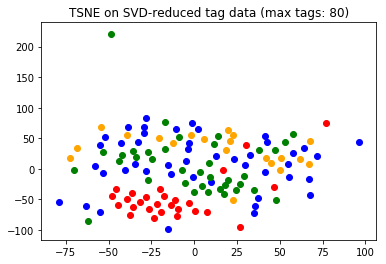

X.shape is (129, 454)
computing raw SVD


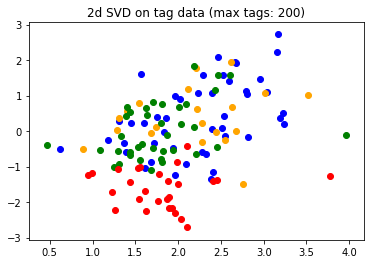

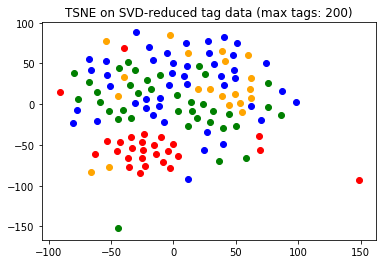

X.shape is (129, 858)
computing raw SVD


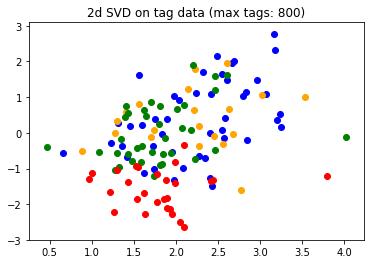

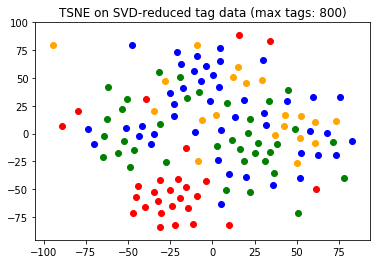

In [298]:
from collections import OrderedDict

for term_limit in (5,10,20,40,80,200,800):
    valid_terms = set([])
    for sheetname, df in sheet_tags.iteritems():
        term_count = Counter()
        for index, row in df.iterrows():
            term_count.update( chain( *row.tolist() ) )
        valid_terms.update([ i[0] for i in term_count.most_common()[:term_limit] ])

    megaterms = OrderedDict( (term,i) for i,term in enumerate( valid_terms ) )

    global_rowfeatures = defaultdict(list)
    default_features = np.zeros( len(megaterms) )
    for sheetname, df in sheet_tags.iteritems():
        for index, row in df.iterrows():
            row_features = default_features.copy()
            thisrow = list(chain( *row.tolist() ))
            for t in thisrow:
                if t in megaterms:
                    row_features[ megaterms[t] ] = 1
            global_rowfeatures[sheetname].append(row_features)
#                colors.append( colors_sheets[sheetname] )
    X = np.array( list(chain(*global_rowfeatures.values())) )
    print( 'X.shape is {}'.format(X.shape) )
#        metrics = [ 'cosine', 'dice', 'jaccard', 'cityblock' ]

    print( 'computing raw SVD' )
    svd = TruncatedSVD( n_components=2, n_iter=7, random_state=42 )
    X_p = svd.fit_transform(X)
    np.set_printoptions(suppress=True)

    plt.figure()
    plt.title( '2d SVD on tag data (max tags: {})'.format(term_limit) )
    for idx, (x,y) in enumerate( zip(X_p[::,0], X_p[::,1]) ):
        plt.scatter( x, y, color=colors[idx] )
   
    plt.show()

    svd = TruncatedSVD( n_components=5, n_iter=7, random_state=42 )
    X_p = svd.fit_transform(X)
    model = TSNE( n_components=2, random_state=0, early_exaggeration=8.0, metric='precomputed' )
    distances = squareform( pdist( X_p, metric='cosine' ) )
    distances[np.isnan(distances)] = 0
    np.set_printoptions(suppress=True)
    Y_map = model.fit_transform(distances)
    
    plt.figure()
    plt.title( 'TSNE on SVD-reduced tag data (max tags: {})'.format(term_limit) )
    for idx, (x,y) in enumerate( zip(Y_map[::,0], Y_map[::,1]) ):
        plt.scatter( x, y, color=colors[idx] )
    
    plt.show()